['Well', 'Cq', 'gene', 'type', 'sample', 'sample_number', 'repeat', 'experiment', 'is_outlier', 'type_outlier']


Index(['gene', 'line', 'mean_relative_concentration',
       'std_relative_concentration', 'sample', 'plate',
       'Normalized relative concentration (Actin1)'],
      dtype='object')

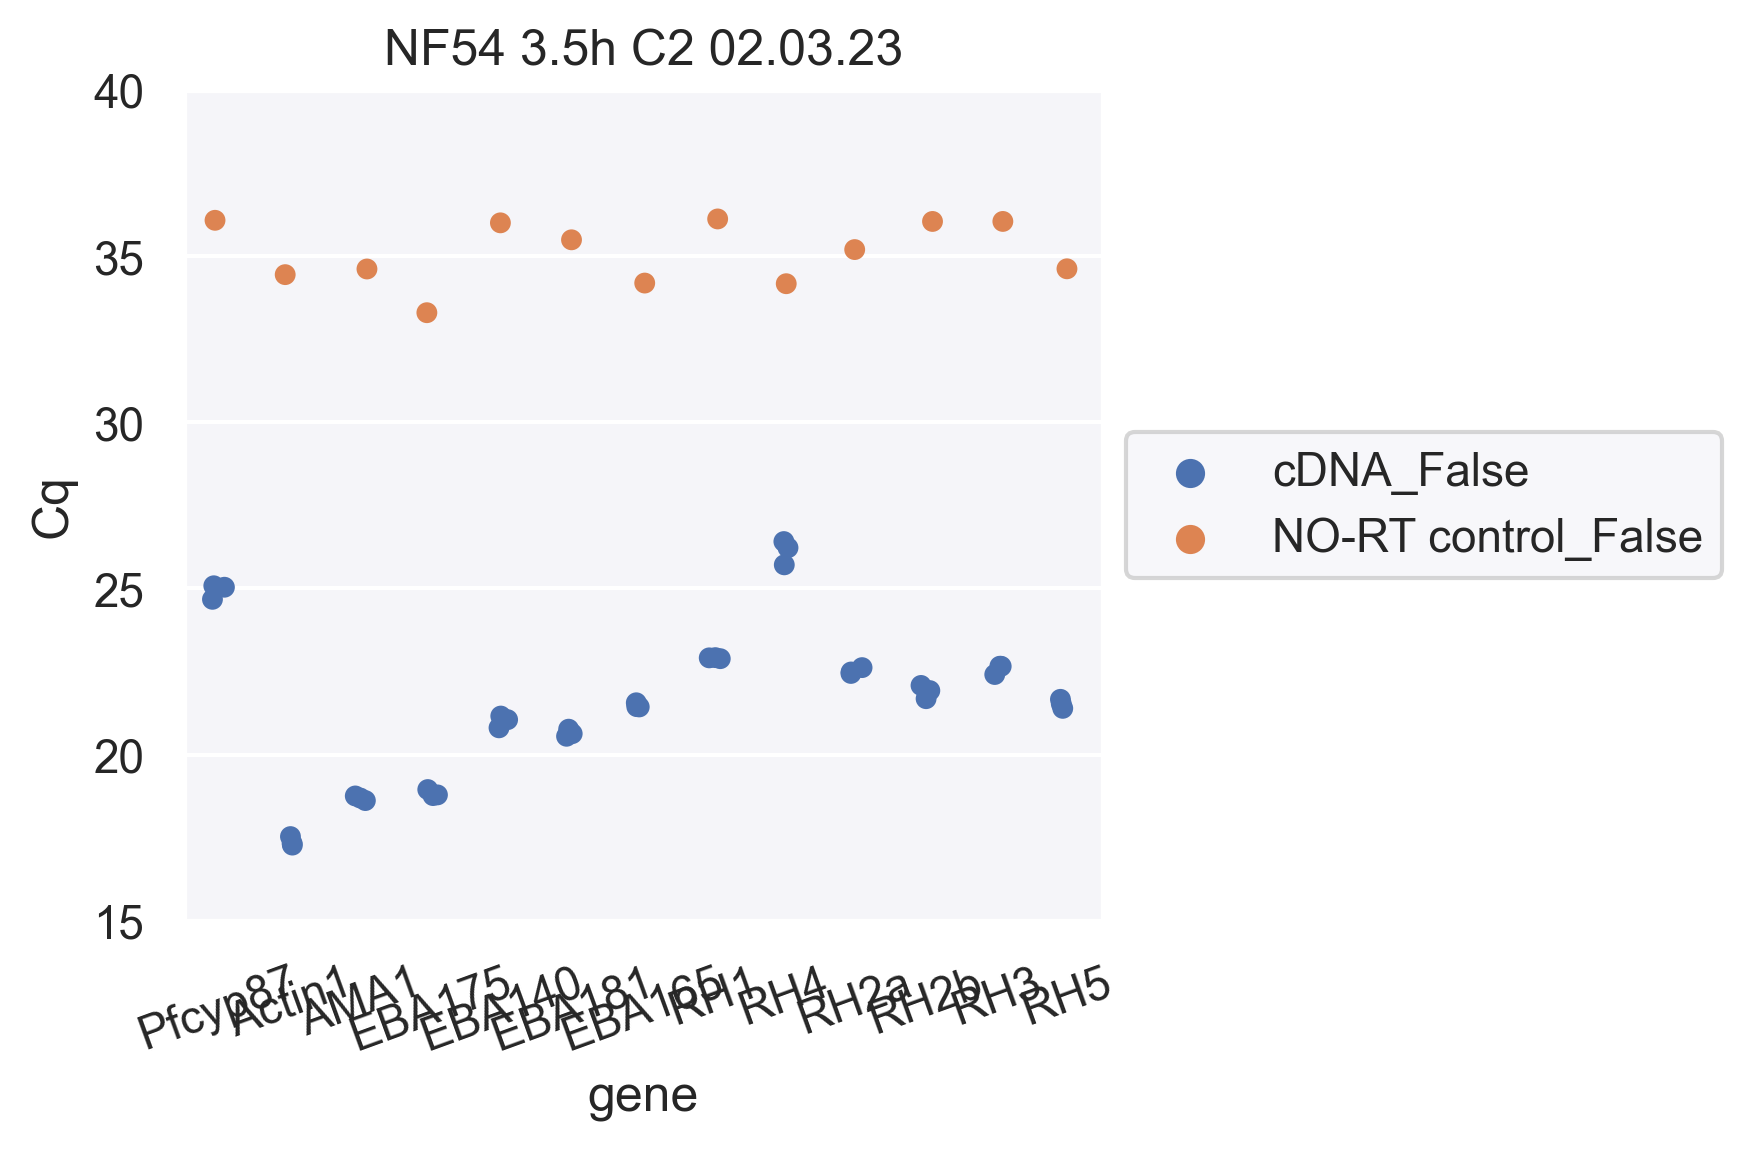

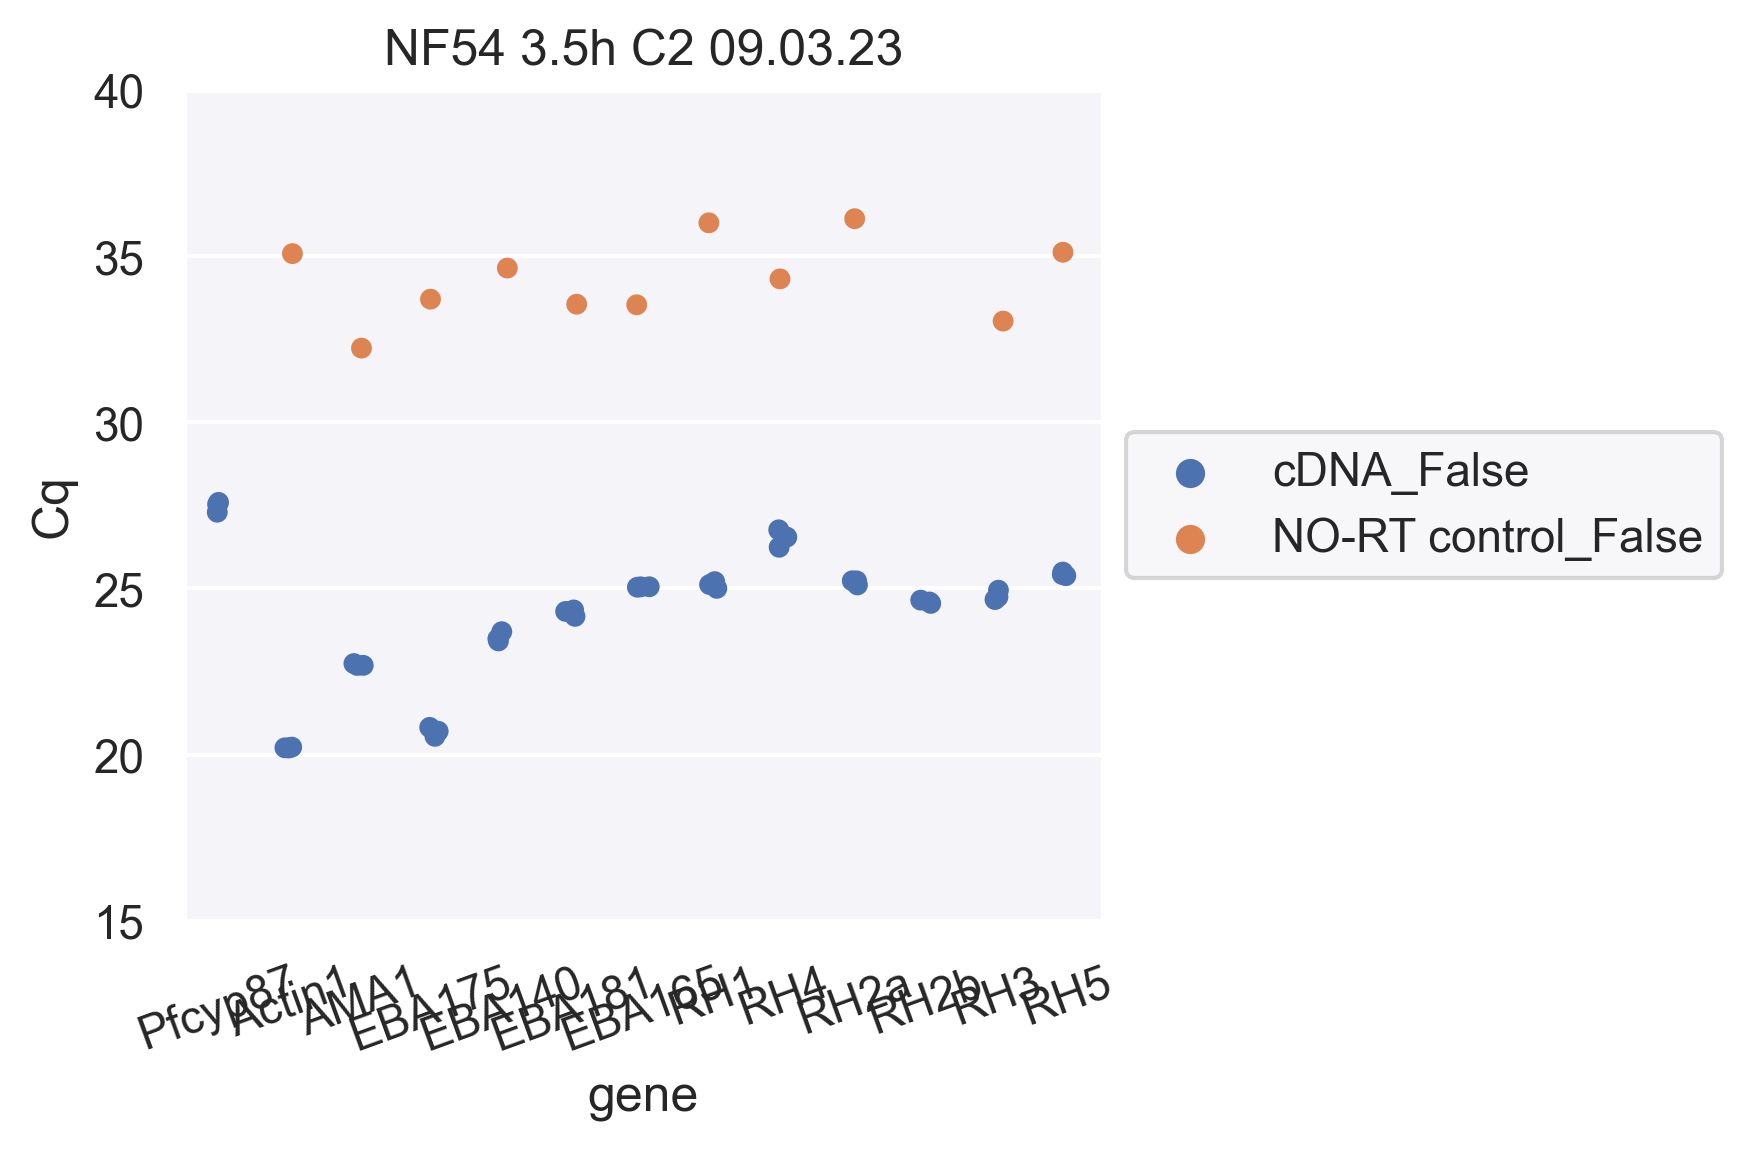

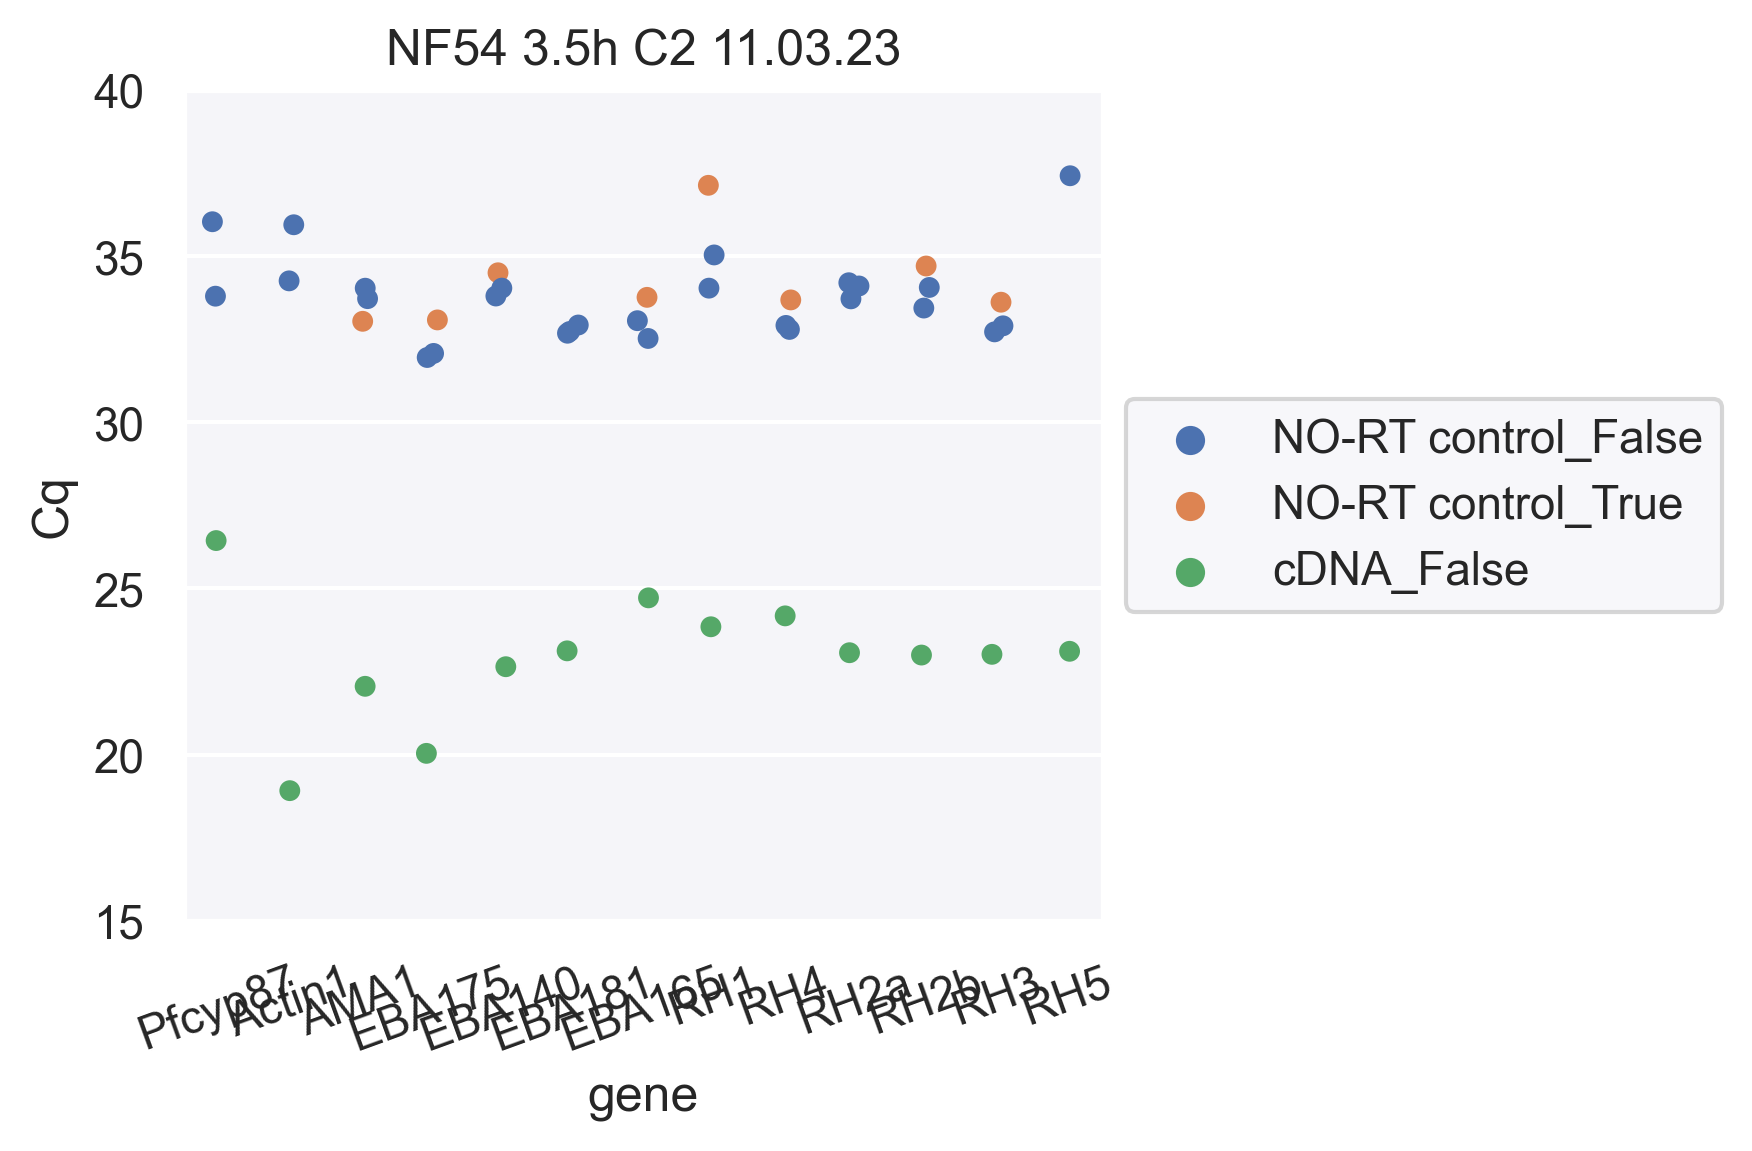

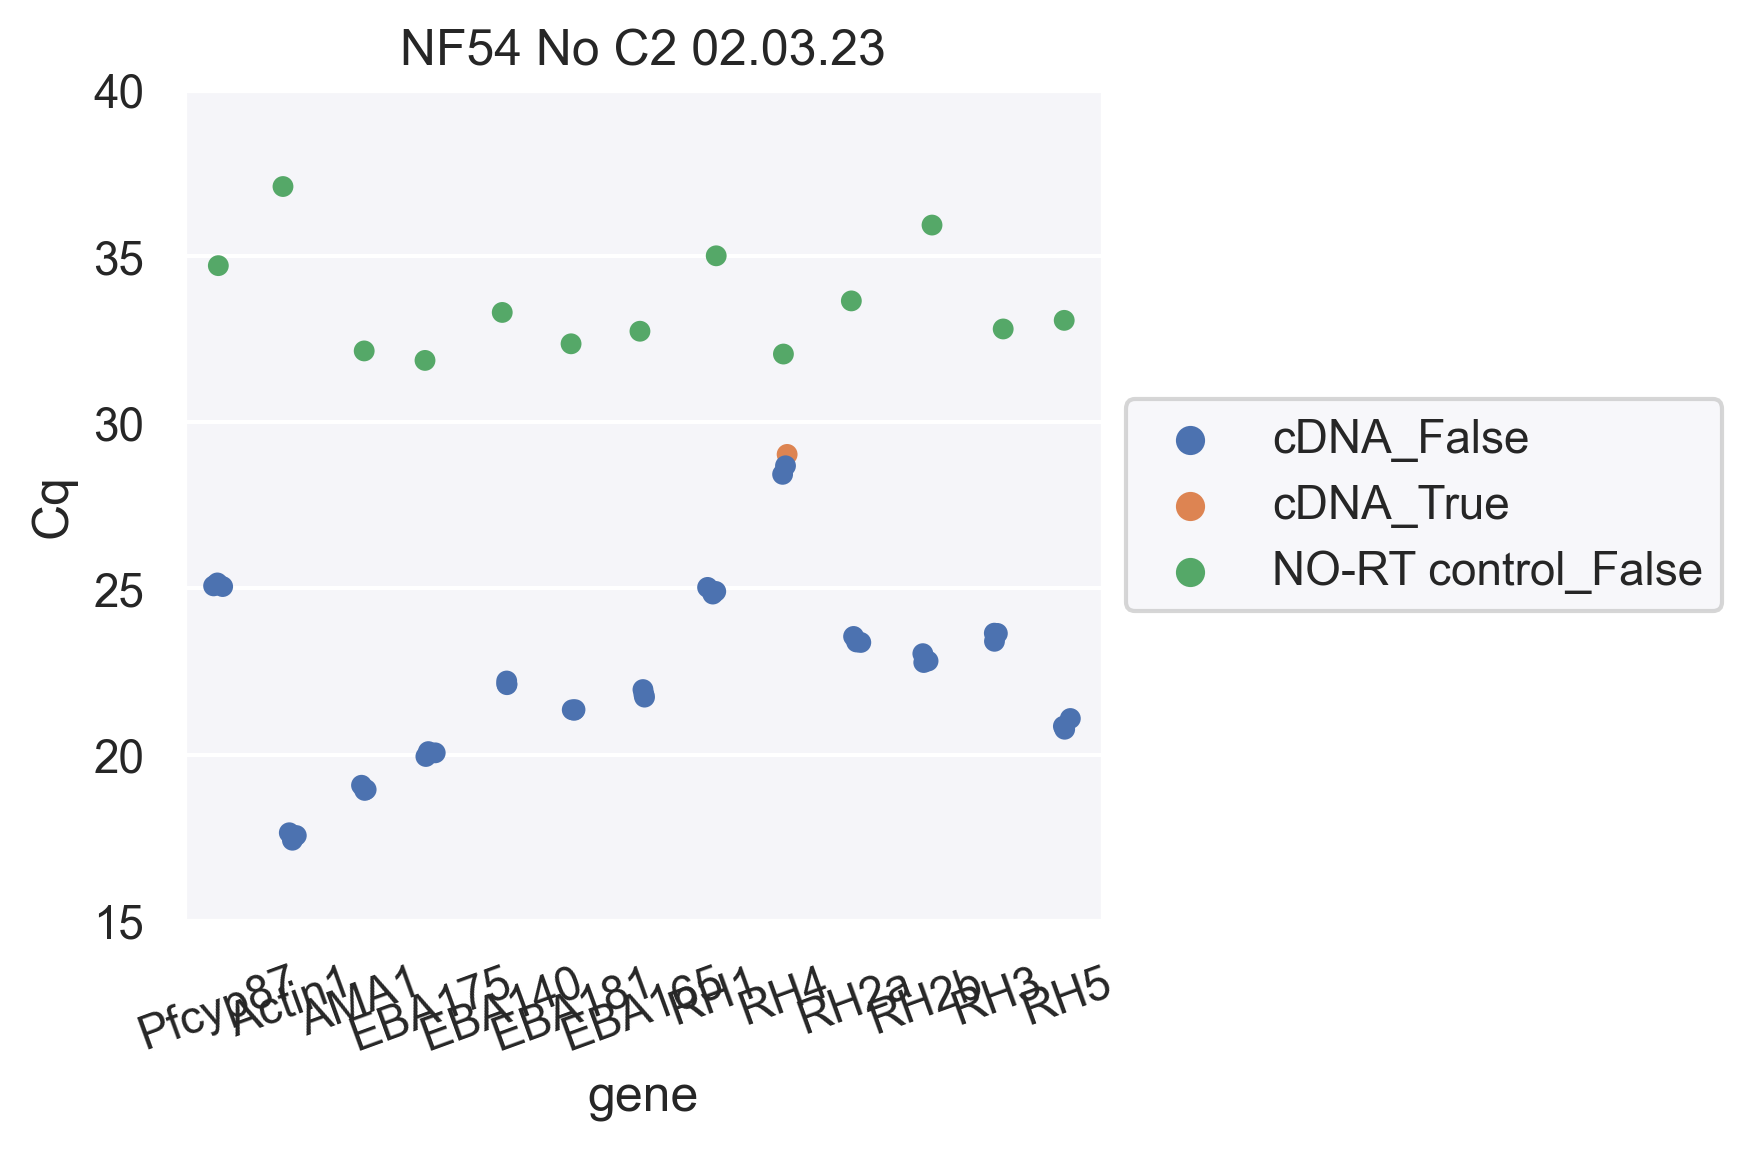

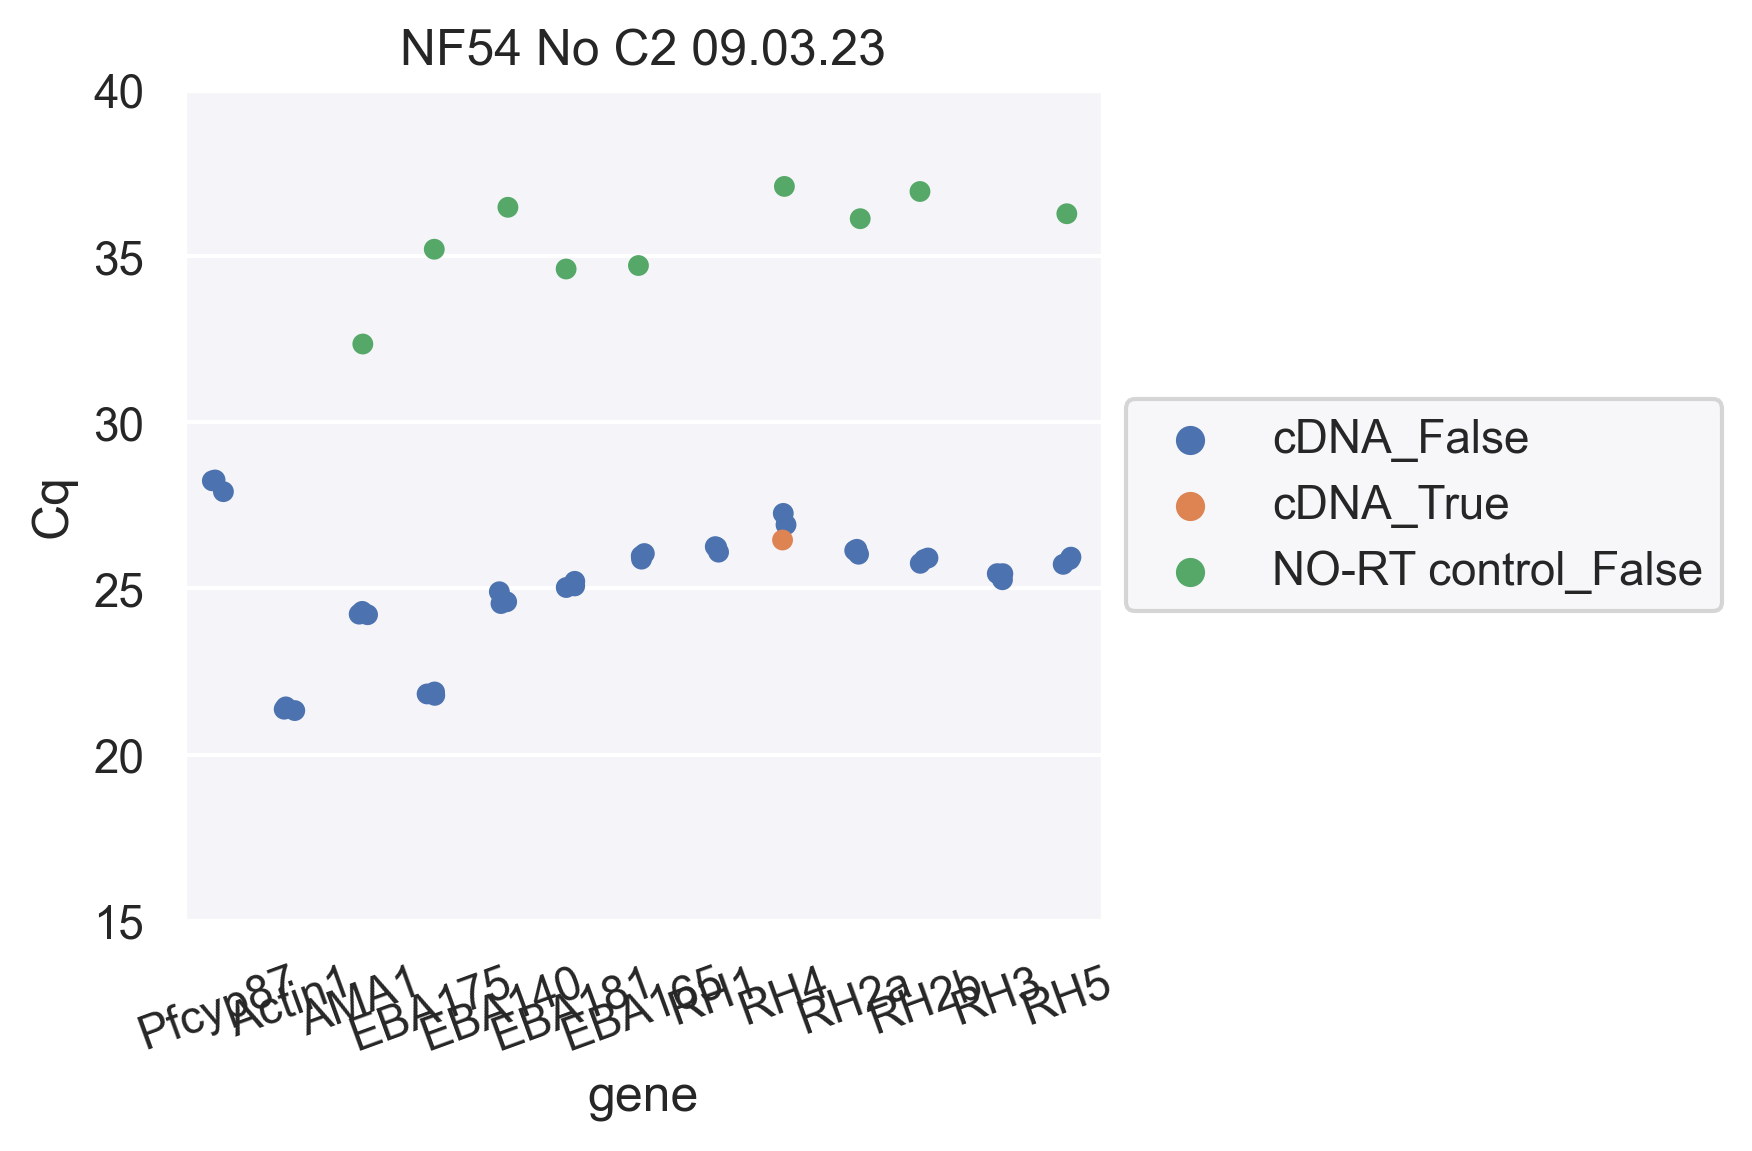

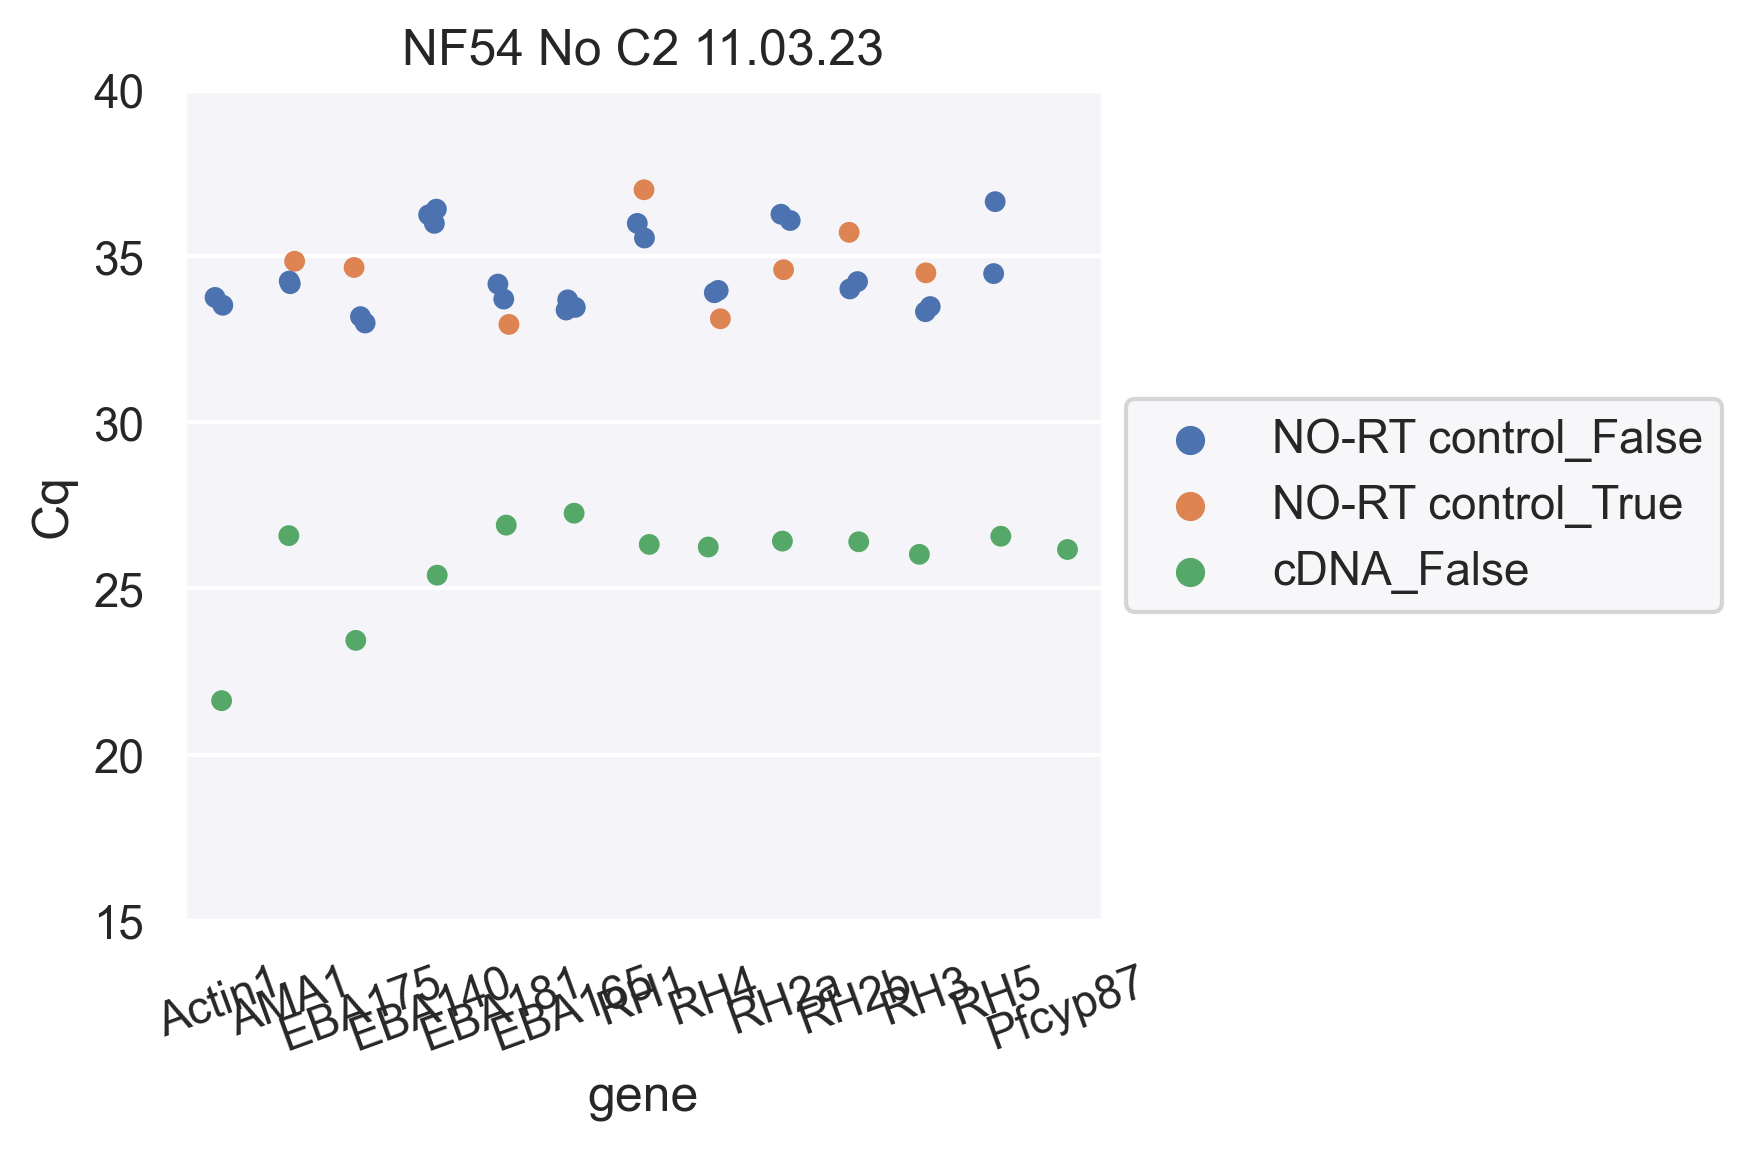

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sigfig

from qPCR_plotting import *

import EmmaPlotColors

experiment = 'EER0165'

df = pd.read_json('qpcr_df_c2_01.json')
print(list(df.columns))

output_folder = get_output_folder(experiment=experiment)

standard_results = fit_to_standard(df, plot=False, output_folder=output_folder)
plot_nort_controls(df, output_folder=output_folder)

normalization_gene = 'Actin1'
normalization_sample = None

df_cdna, sample_normalization_title, gene_normalization_title = add_concentration_and_normalizations(
    df=df.query('is_outlier == False'),
    standard_results=standard_results,
    normalization_gene=normalization_gene,
    normalization_sample=normalization_sample,
)

normalization_gene = 'Actin1'
dfq = df_cdna.query('gene != @normalization_gene')
dfq.columns

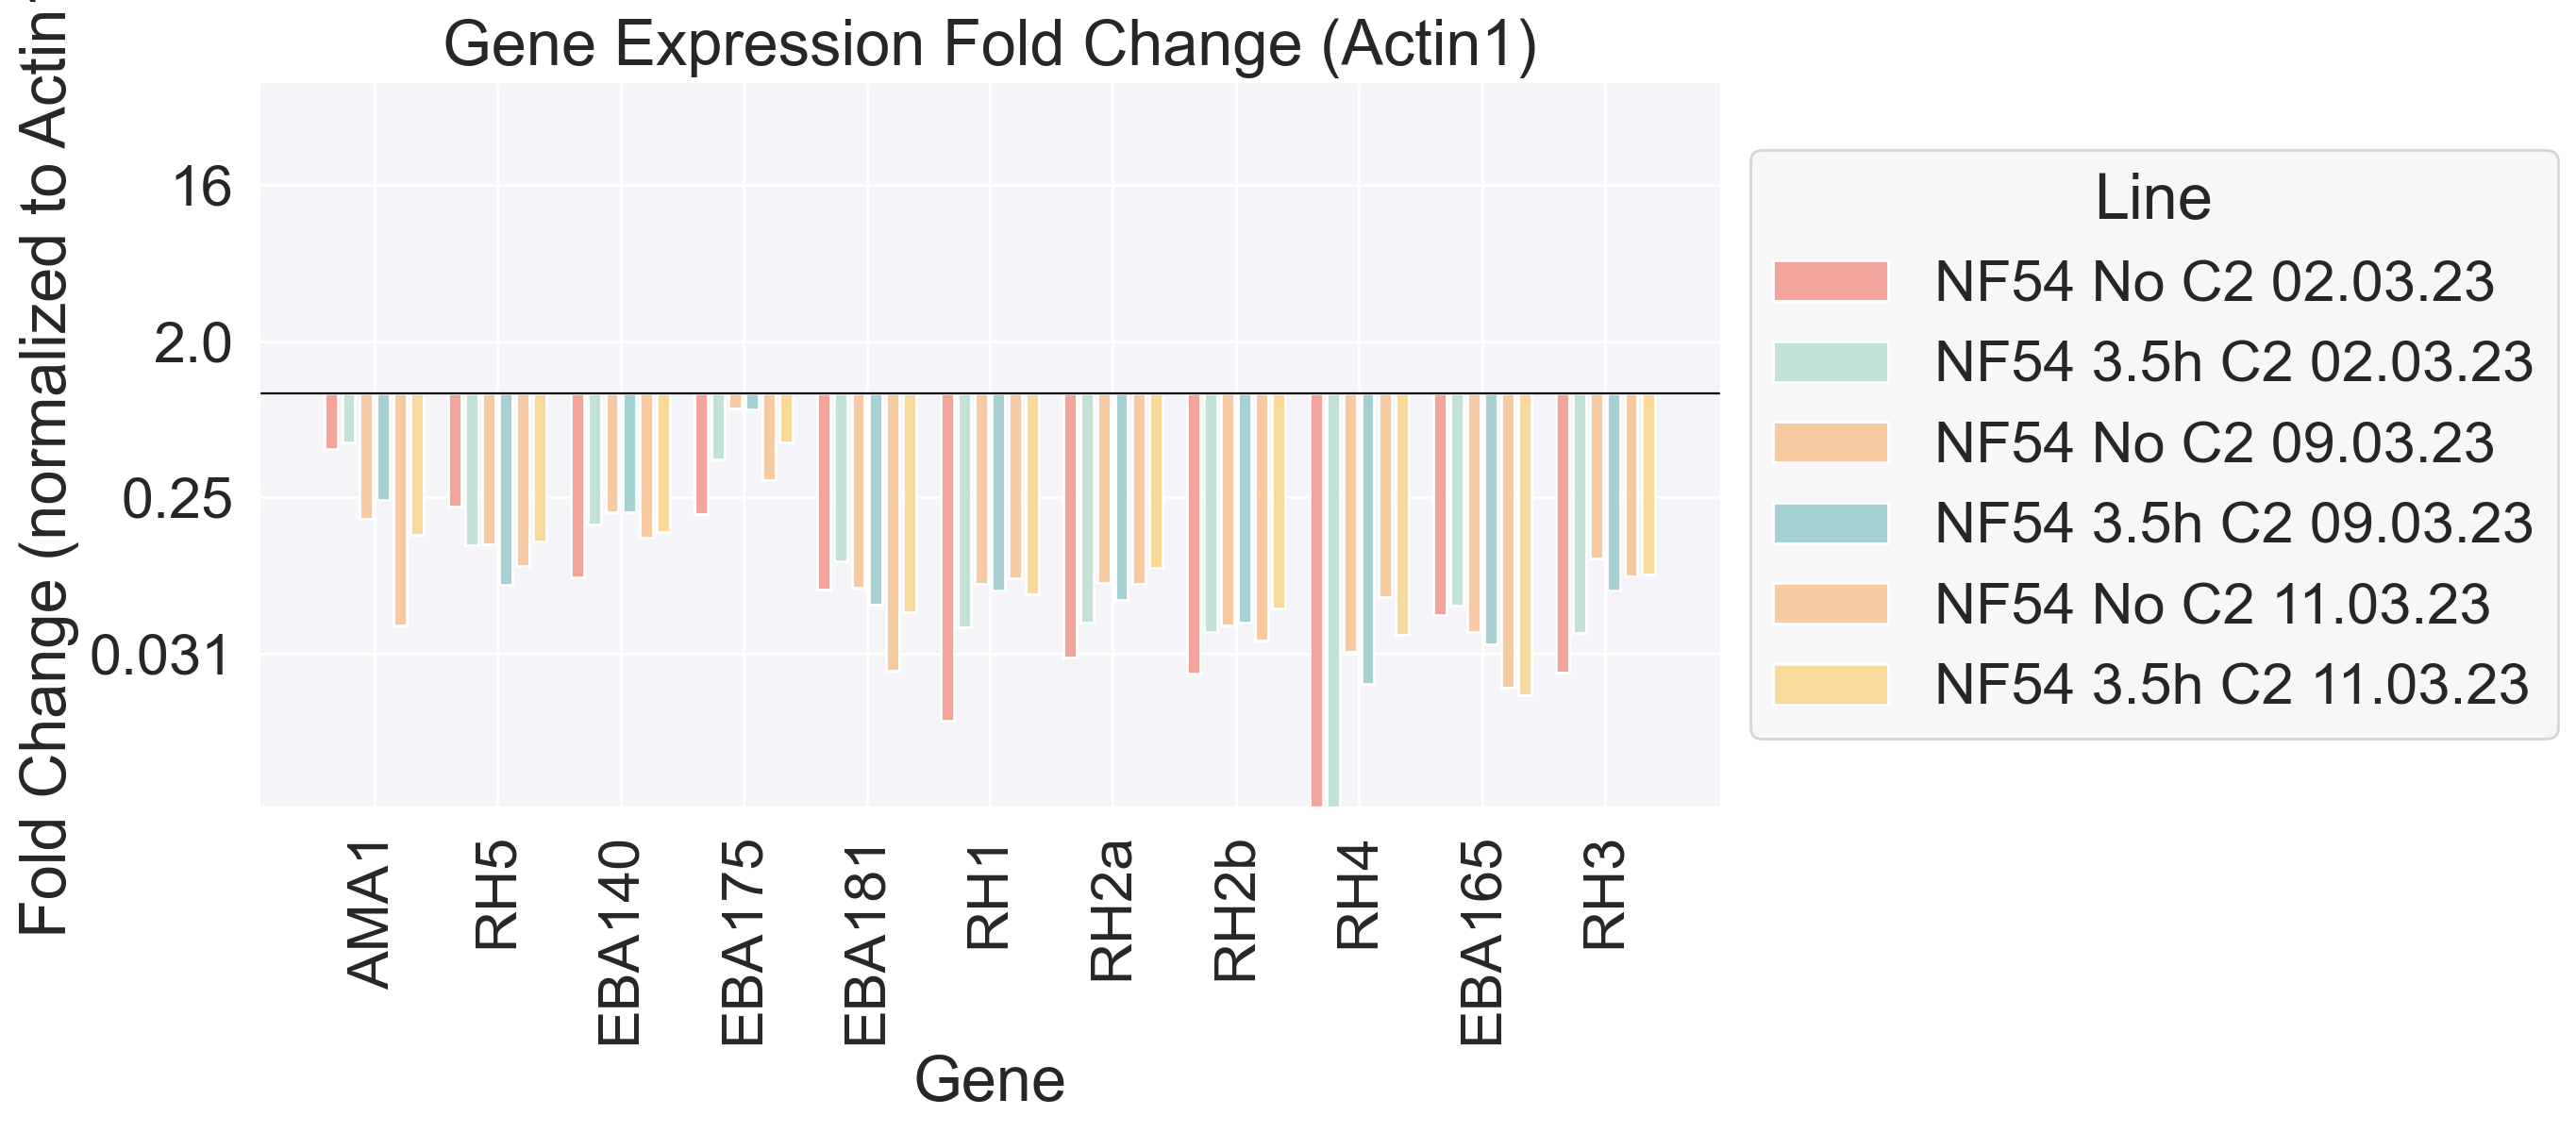

In [2]:
colors_dark = {
    'NF54 3.5h C2 02.03.23': '#C1E2D4',
    'NF54 3.5h C2 09.03.23': '#A5D0D4',
    'NF54 3.5h C2 11.03.23': '#F9DA9A',
    'NF54 No C2 02.03.23': '#F3A59B',
    'NF54 No C2 09.03.23': '#F7CAA1',
    'NF54 No C2 11.03.23': '#F7CAA1',
}

# colors_dark = 
hue_order = [
    'NF54 No C2 02.03.23',
    'NF54 3.5h C2 02.03.23',
    'NF54 No C2 09.03.23',
    'NF54 3.5h C2 09.03.23',
    'NF54 No C2 11.03.23',
    'NF54 3.5h C2 11.03.23',
]

dfq = dfq.query('gene != "Pfcyp87"')

log_barplot(
    df=dfq,
    x_key='gene',
    y_key=gene_normalization_title,
    hue_key='line',
    x_order=EmmaPlotColors.gene_order,
    hue_order=hue_order,
    colors=colors_dark,
    title=f"Gene Expression Fold Change ({normalization_gene})",
    ylabel=f"Fold Change (normalized to {normalization_gene})",
    output_folder=output_folder,
    figsize=(10,5),
)

['NF54 3.5h C2' 'NF54 No C2']


(0.004, 64)

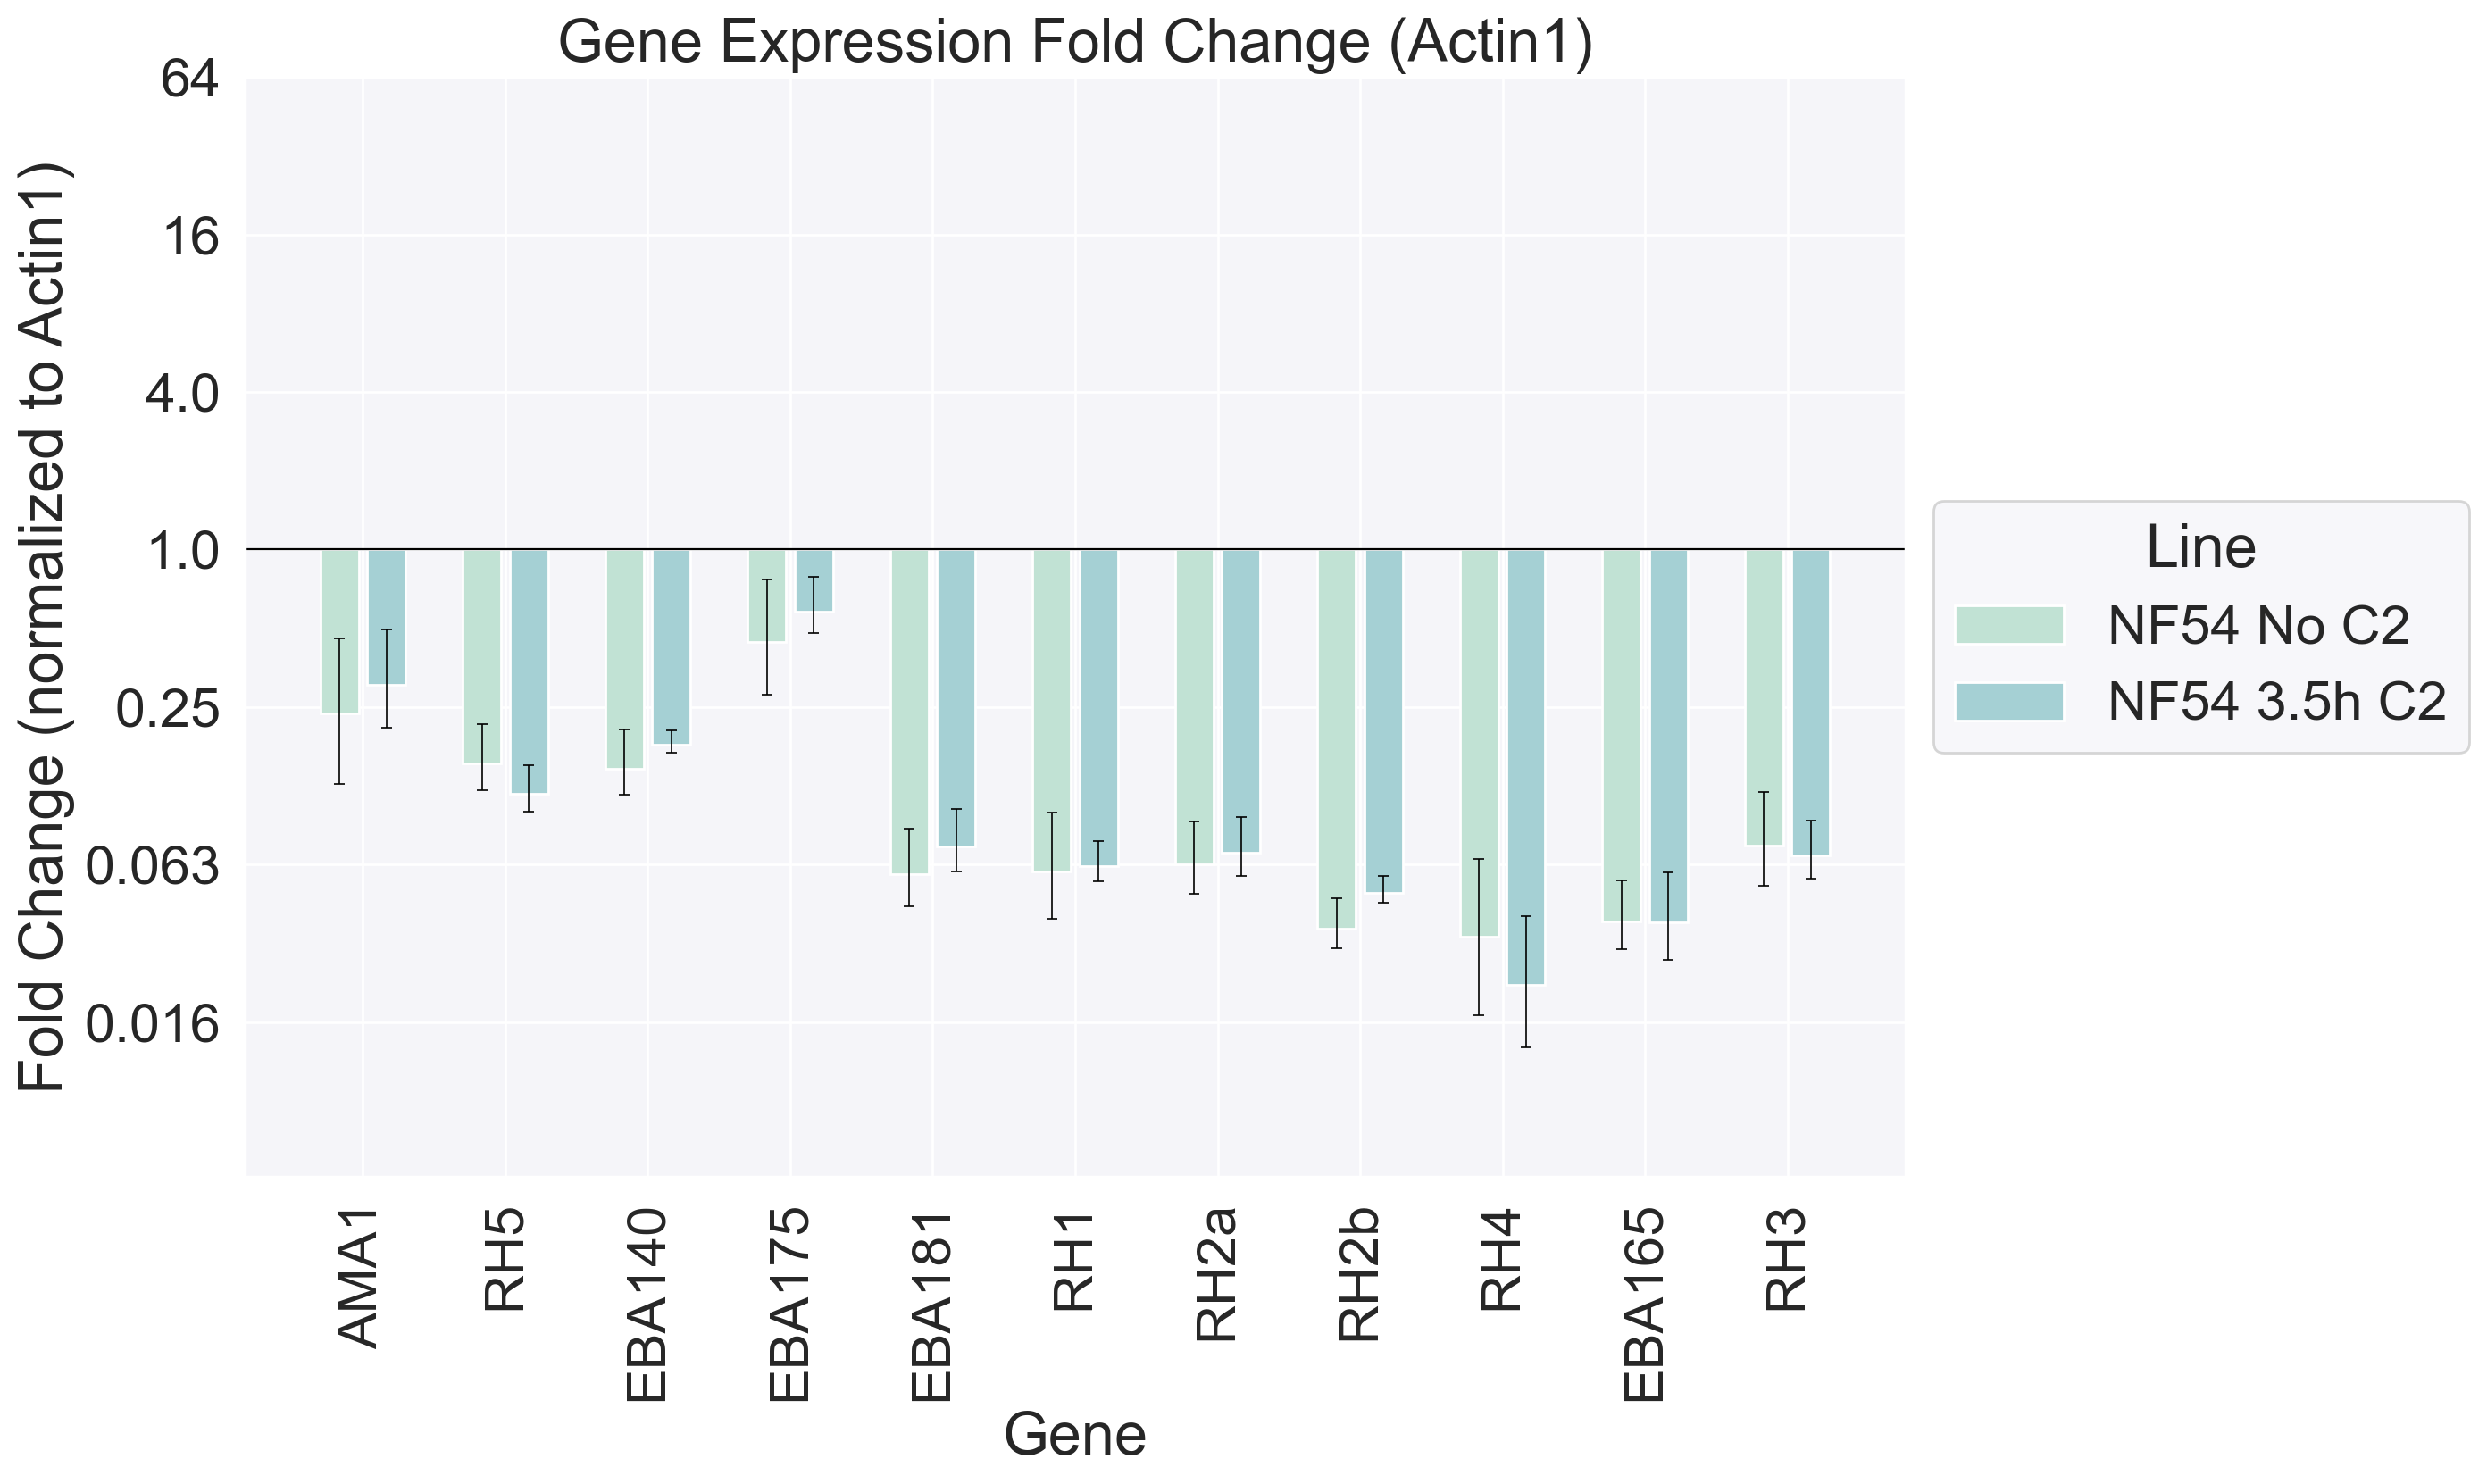

In [10]:
colors_dark = {
    'NF54 No C2': '#C1E2D4',
    'NF54 3.5h C2': '#A5D0D4',
}

# colors_dark = 
hue_order = [
    'NF54 No C2',
    'NF54 3.5h C2',
]

dfq_rep = dfq.copy()
dfq_rep['line'] = dfq_rep['line'].apply(lambda x: ' '.join(x.split(' ')[:-1]))
print(dfq_rep['line'].unique())

log_barplot(
    df=dfq_rep,
    x_key='gene',
    y_key=gene_normalization_title,
    hue_key='line',
    hue_order=hue_order,
    x_order=EmmaPlotColors.gene_order,
    colors=colors_dark,
    title=f"Gene Expression Fold Change ({normalization_gene})",
    ylabel=f"Fold Change (normalized to {normalization_gene})",
    output_folder=output_folder,
    figsize=(12,8),
    group_ratio=0.6,
    bar_ratio=0.9,
)

#plt.yscale('log', base=2)
plt.ylim(0.004, 64)